In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from platform import python_version
python_version()

'3.11.7'

In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.colors import ListedColormap

In [4]:
guid_id_vals = [11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35, 36]
guid_id_colors = ["#ff0000", "#00d30e", "#0000ff", "#ffae00", "#cd00cd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7"]

# Create a ListedColormap using the defined colors
guid_id_cmap = ListedColormap(guid_id_colors)

guid_id_cdict = dict(map(lambda v,c : (v,c) , guid_id_vals, guid_id_colors))

print(guid_id_cdict)

{11: '#ff0000', 12: '#00d30e', 13: '#0000ff', 14: '#ffae00', 15: '#cd00cd', 20: '#8c564b', 21: '#e377c2', 22: '#7f7f7f', 23: '#bcbd22', 24: '#17becf', 25: '#aec7e8', 26: '#ffbb78', 31: '#98df8a', 32: '#ff9896', 33: '#c5b0d5', 34: '#c49c94', 35: '#f7b6d2', 36: '#c7c7c7'}


In [5]:
data = pd.read_csv('ops3_log.csv')


data['time'] = data['loop_dt'].cumsum()

data.head()

entry_data = data[data['guid_id'] < 20]
taem_data = data[data['guid_id'] >= 20]
a_l_data = data[data['guid_id'] >= 30]


,guid_id,loop_dt,rwy_alt,vel,surfv,mach,hdot,lat,long,range,...,nz,drag,eow,prog_pch,prog_roll,prog_yaw,flap_defl,spdbk_defl,Unnamed: 19,time
0,11,0.48,116193.707261,7858.221877,7503.890659,20.276180,-176.508807,27.668434,167.026494,7018.538892,...,0.000327,0.041705,9.800283e+06,40.093060,-0.007467,0.006718,0.0,0.0,NaN,0.48
1,11,0.50,116105.460018,7858.318436,7503.987852,20.308806,-176.486918,27.685787,167.056585,7014.873833,...,0.000330,0.042004,9.800238e+06,40.075485,-0.033568,-0.004388,0.0,0.0,NaN,0.98
2,11,0.48,116020.753341,7858.410281,7504.080320,20.343003,-176.464890,27.703855,167.087942,7011.355283,...,0.000334,0.042395,9.800192e+06,40.047650,-0.057742,-0.013794,0.0,0.0,NaN,1.46
3,11,0.50,115932.528552,7858.506375,7504.177082,20.376035,-176.442476,27.721193,167.118056,7007.690028,...,0.000337,0.042683,9.800146e+06,40.022457,-0.069512,-0.019412,0.0,0.0,NaN,1.96
4,11,0.48,115847.843221,7858.598848,7504.270202,20.410655,-176.421235,27.739246,167.149437,7004.171289,...,0.000342,0.043095,9.800102e+06,39.988157,-0.085507,-0.019185,0.0,0.0,NaN,2.44


In [6]:
def angle360(angle):
    out = angle

    while (out >= 360):
        out -= 360
    while (out < 0):
        out += 360
    return out

def angle180(angle):
    out = angle

    while (out >= 180):
        out -= 360
    while (out < -180):
        out += 360
    return out

<Figure size 1500x1500 with 0 Axes>

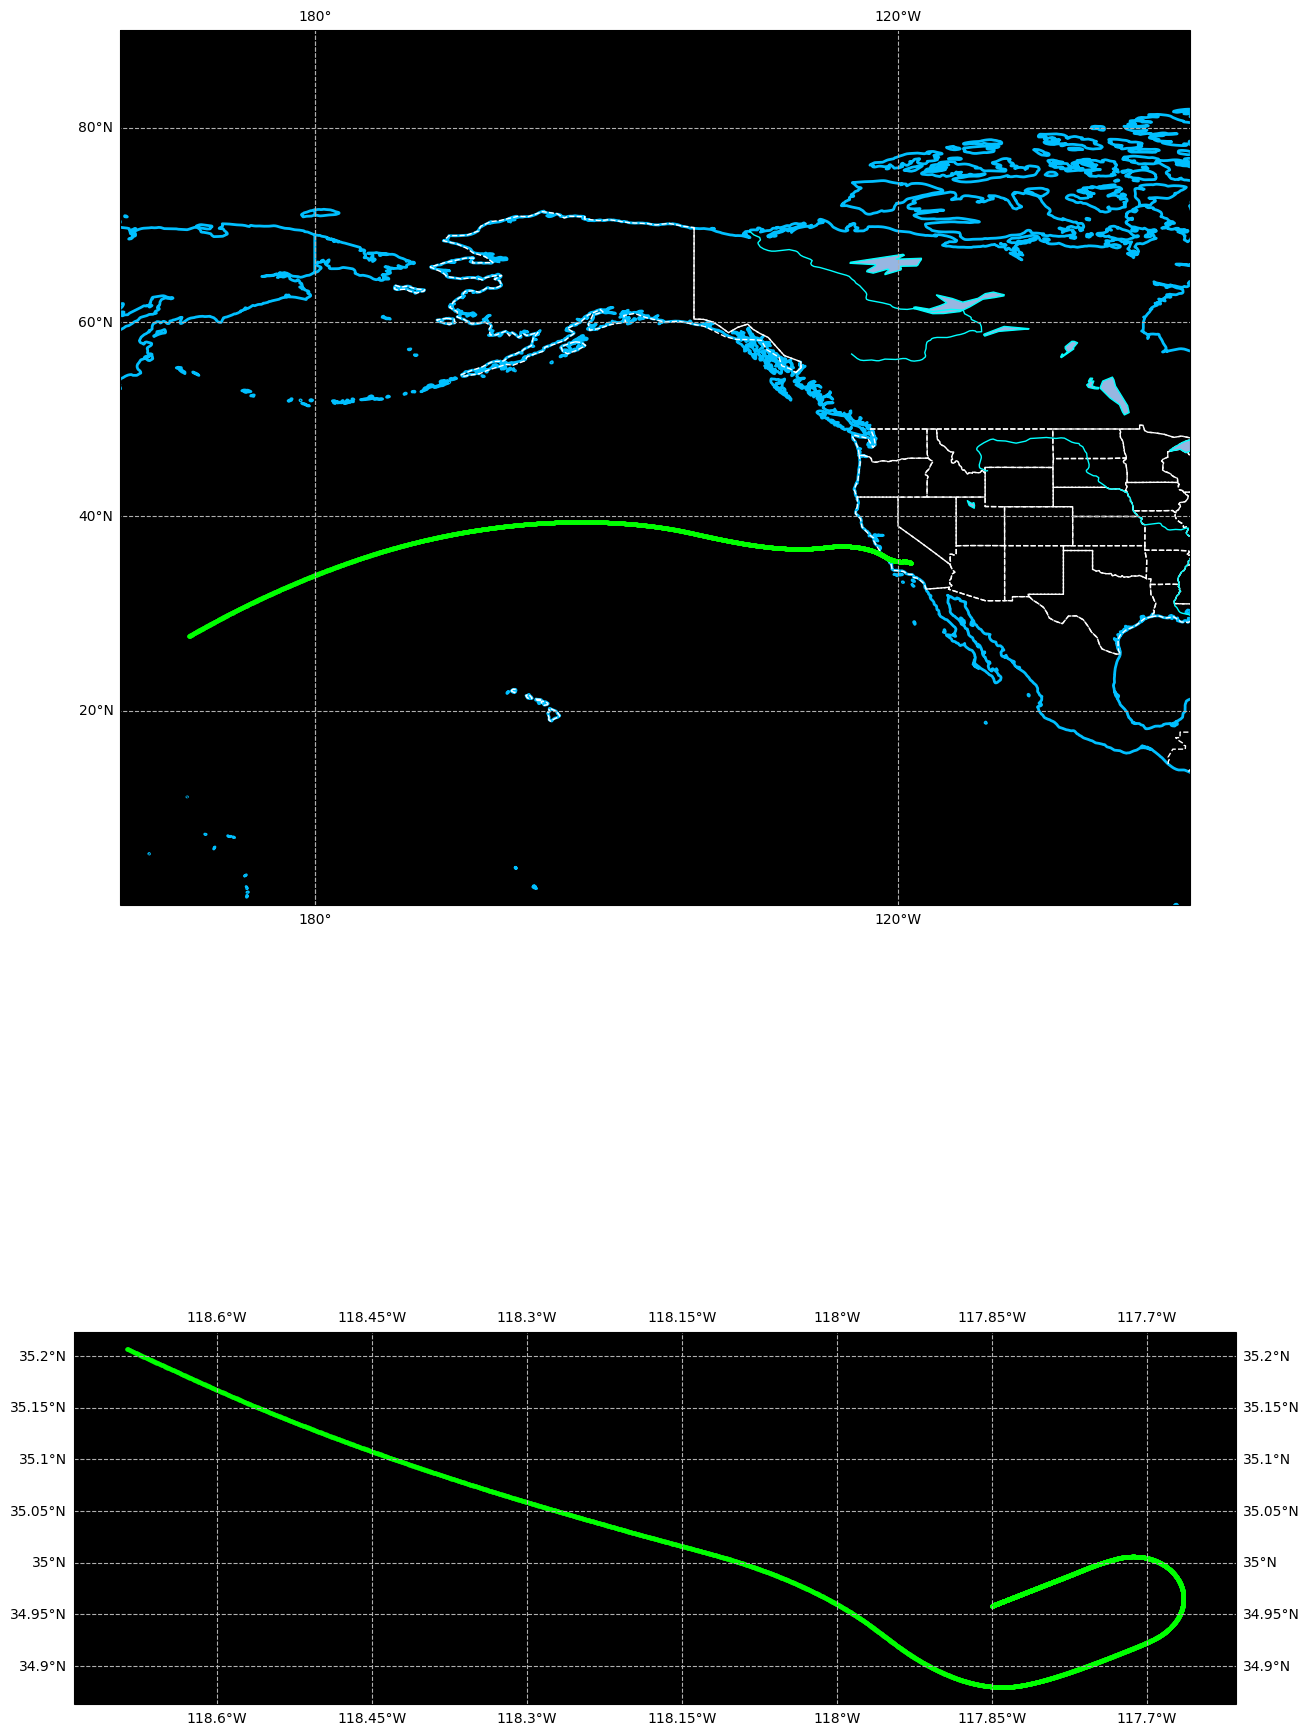

In [44]:
fig = plt.figure(figsize=(15, 15))
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 25), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

ax = axs[0]

ax.plot(entry_data['long'], entry_data['lat'], marker='o', linestyle='', color='#00ff00', markersize=2, transform=ccrs.PlateCarree())

ax.set_extent([90, -20, 0, 90], crs=ccrs.PlateCarree(central_longitude=180))
ax.set_facecolor('k')
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='#00bfff',
                                        facecolor='black',
                                           linewidth=2))
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='white')
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='white')
ax.add_feature(cfeature.LAKES, linestyle='-', edgecolor='cyan')
ax.add_feature(cfeature.RIVERS, linestyle='-', edgecolor='cyan')

# Add coastlines and gridlines
ax.gridlines(linestyle='--', draw_labels=True)




ax = axs[1]

ax.plot(taem_data['long'], taem_data['lat'], marker='o', linestyle='', color='#00ff00', markersize=2, transform=ccrs.PlateCarree())

ax.set_facecolor('k')
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='#00bfff',
                                        facecolor='black',
                                           linewidth=2))
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='white')
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='white')
ax.add_feature(cfeature.LAKES, linestyle='-', edgecolor='cyan')
ax.add_feature(cfeature.RIVERS, linestyle='-', edgecolor='cyan')



# Add coastlines and gridlines
ax.gridlines(linestyle='--', draw_labels=True)


# Show the plot
plt.show()

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Altitude (km)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Speed (m/s)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Range (km)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'delaz')

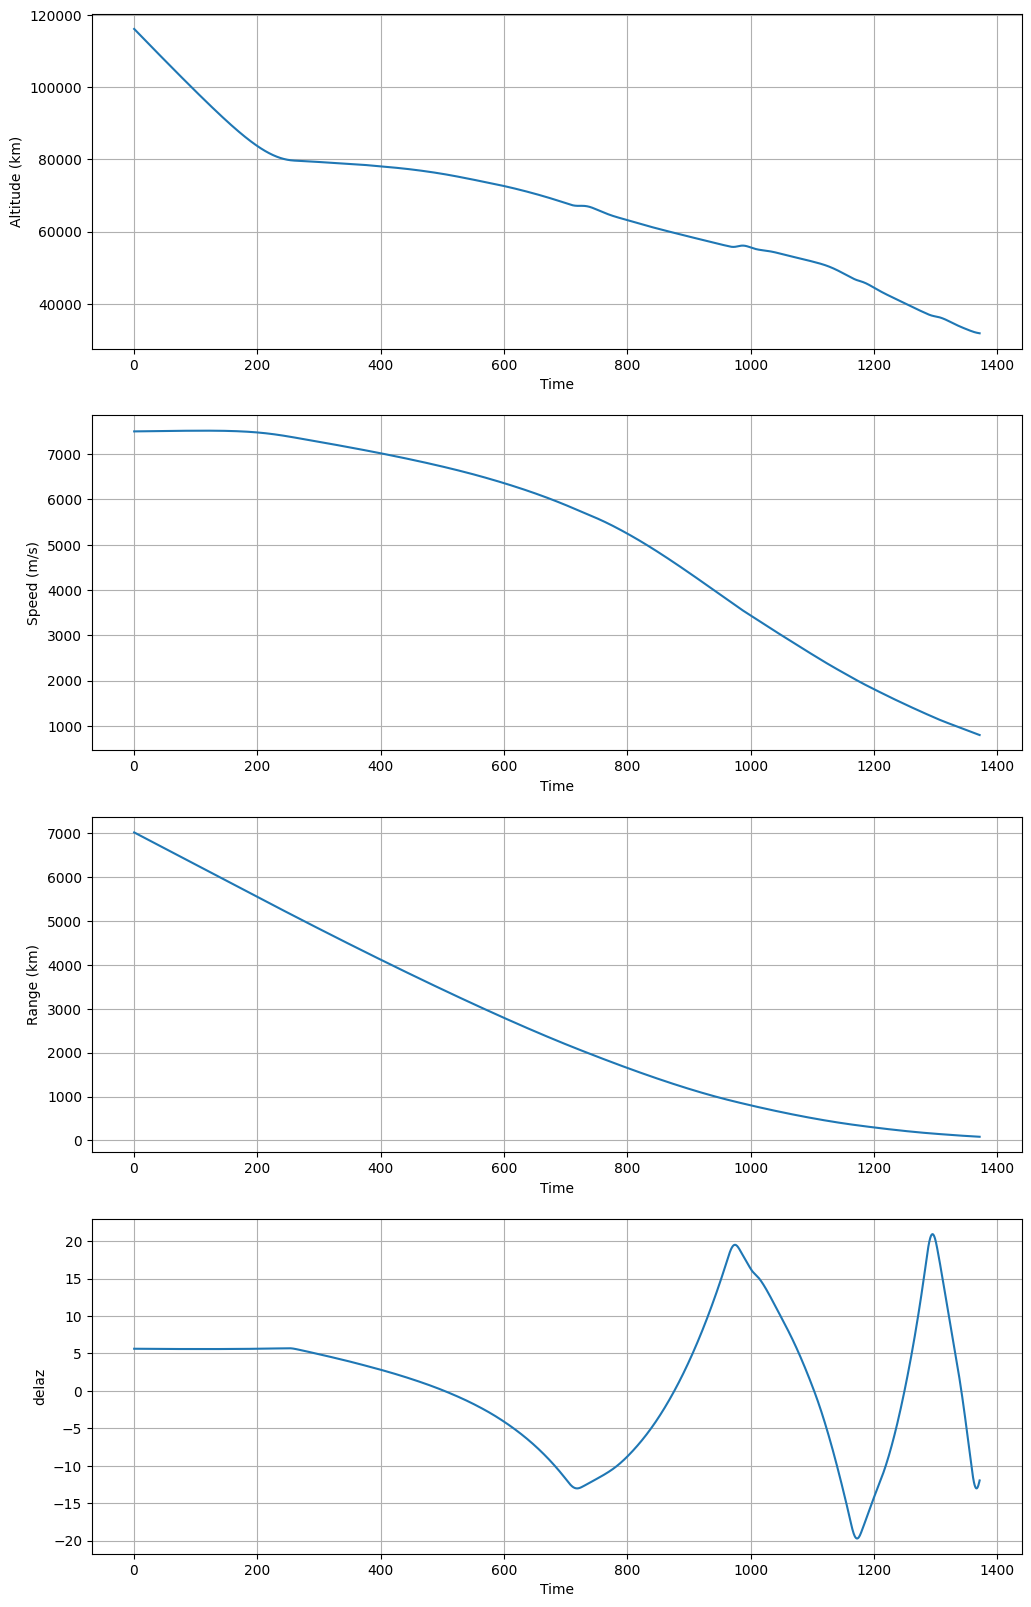

In [8]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 5 * 4))

plt_ = ax[0]
plt1 = plt_.plot(entry_data['time'], entry_data['rwy_alt'])
    

plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()
  


plt_ = ax[1]
plt1 = plt_.plot(entry_data['time'], entry_data['surfv'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()

plt_ = ax[2]
plt1 = plt_.plot(entry_data['time'], entry_data['range'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Range (km)')
plt_.grid()


plt_ = ax[3]
plt1 = plt_.plot(entry_data['time'], entry_data['delaz'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('delaz')
plt_.grid()


Text(0.5, 0, 'surfv')

Text(0, 0.5, 'Aoa °')

(0.0, 50.0)

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'Roll - Yaw (°)')

(-100.0, 100.0)

(0.0, 52.0)

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'drag (ft/s)')

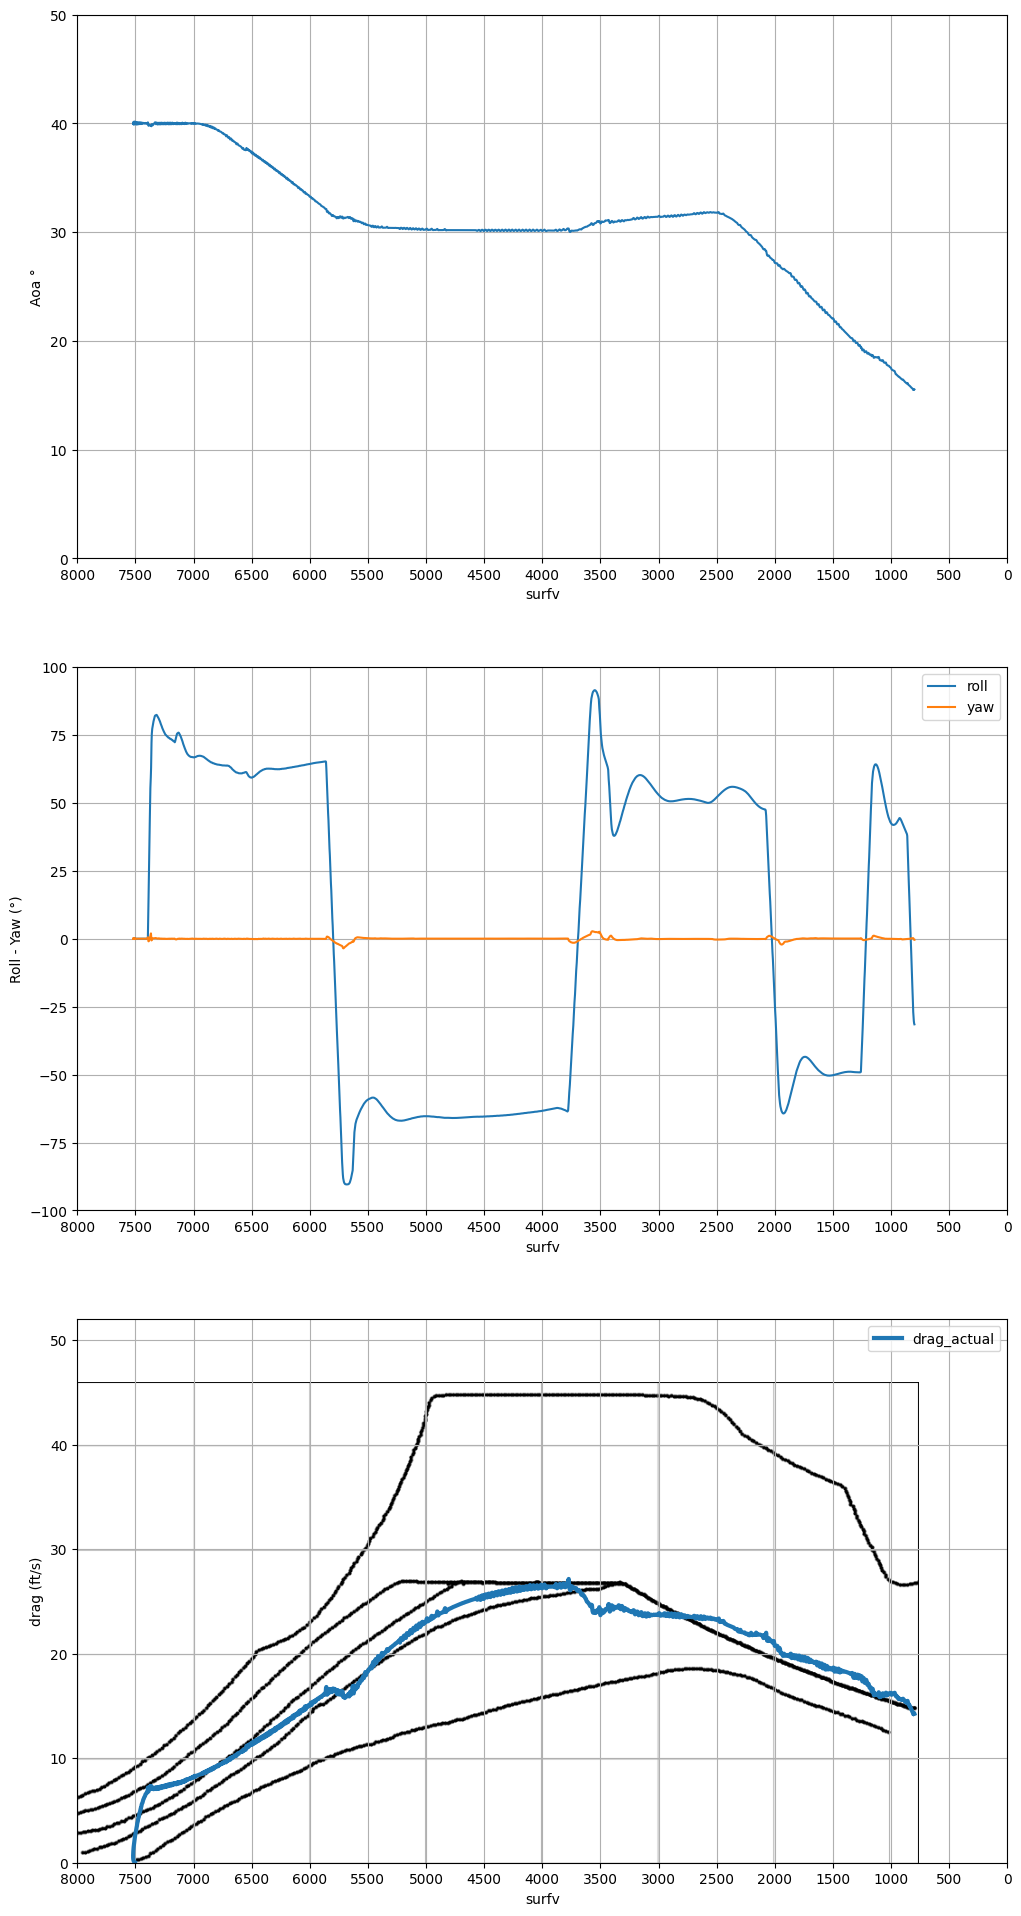

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8 * 3))

major_ticks = np.arange(0, 8500, 500)

plt_ = ax[0]
plt_.plot(entry_data['surfv'], entry_data['prog_pch'])
    
plt_.set_xlabel('surfv');
plt_.set_ylabel('Aoa °')
plt_.set_ylim(0, 50);
plt_.set_xticks(major_ticks);
plt_.grid();


plt_.invert_xaxis()

plt_ = ax[1]

plt1 = plt_.plot(entry_data['surfv'], entry_data['prog_roll'], label='roll');
plt1 = plt_.plot(entry_data['surfv'], entry_data['prog_yaw'], label='yaw');

    
plt_.set_xlabel('surfv')
plt_.set_ylabel('Roll - Yaw (°)')
plt_.set_ylim(-100, 100);
plt_.legend()

plt_.set_xticks(major_ticks);
plt_.grid();

plt_.invert_xaxis()


plt_ = ax[2]


img = plt.imread("ops3_drag.png")
plt_.imshow(img, aspect='auto', extent=[8000, 762, 0, 46], alpha=1 , cmap='Greys_r')

plt1 = plt_.plot(entry_data['surfv'], entry_data['drag'], label='drag_actual', linewidth=3)
  
plt.ylim([0, 52])

plt_.set_xlabel('surfv')
plt_.set_ylabel('drag (ft/s)')
plt_.legend()
plt_.set_xticks(major_ticks)
plt_.grid()



Text(0, 0.5, 'EOW')

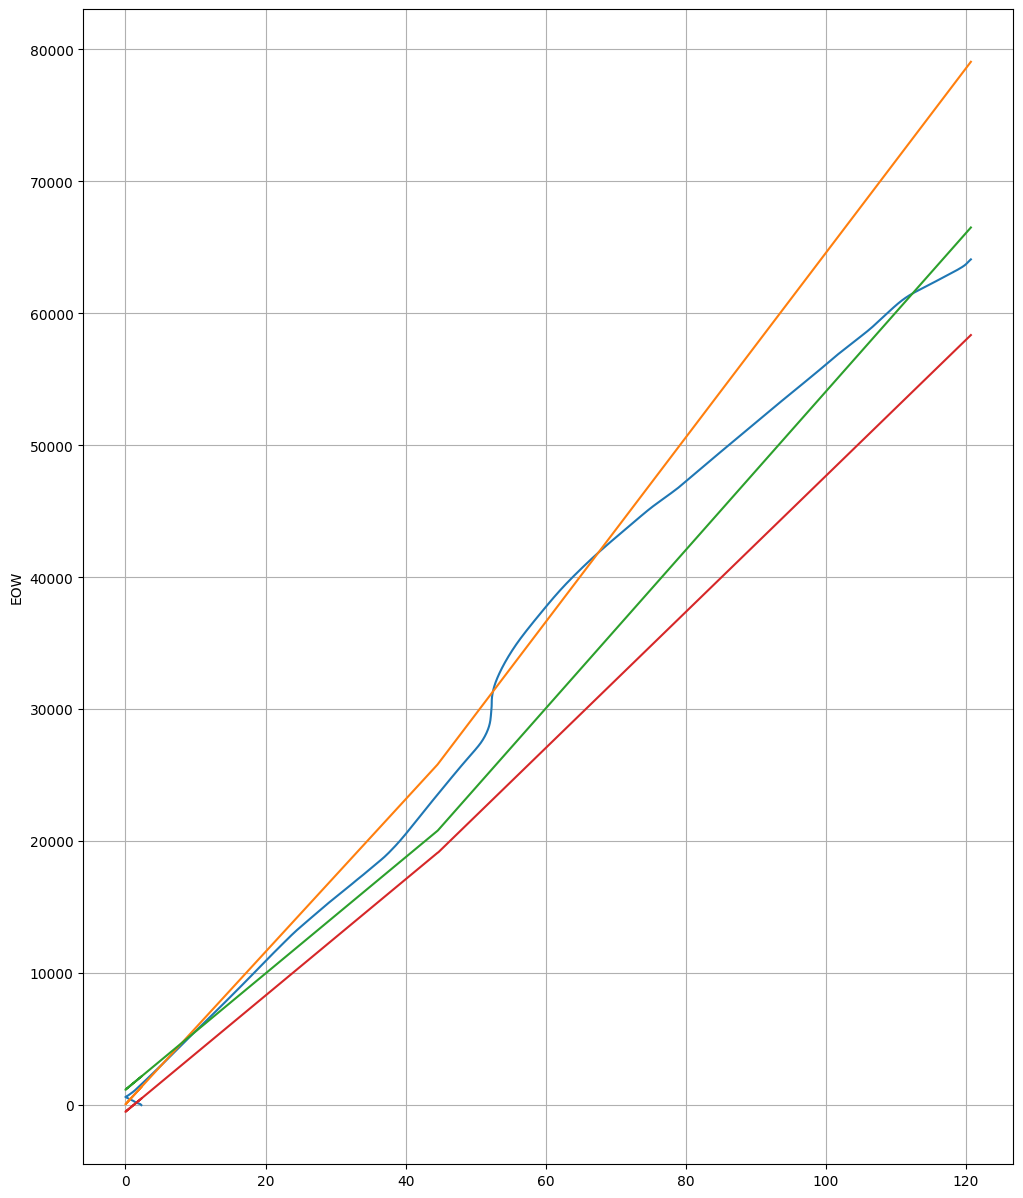

In [43]:
mt2ft = 3.28084

def emep2_(drpred):
    
    emep_c1 = [958, 10018]
    emep_c2 = [0.5155, 0.4404]
    
    eow_spt = [120000, -100000]
    
    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    emep = emep_c1[iel] + drpred * emep_c2[iel] 
    
    return emep

def en2_(drpred):
    
    en_c1 = [-3712, 15500]
    en_c2 = [0.6005, 0.4404]

    eow_spt = [120000, -100000]
    
    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    en = en_c1[iel] + drpred * en_c2[iel] 
    
    return en


def es2_(drpred):
    
    es_c1 = [911.6, 15500]
    es_c2 = [0.69946, 0.57789]

    eow_spt = [120000, -100000]

    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    es = es_c1[iel] + drpred * es_c2[iel] 
    
    
    return es


ali_range = a_l_data.iloc[0]['range']

drpred = (taem_data['range'] - ali_range)*1000*mt2ft


en2 = [en2_(r)/mt2ft for r in drpred]
emep2 = [emep2_(r)/mt2ft for r in drpred]
es2 = [es2_(r)/mt2ft for r in drpred]




fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()




plt_.plot(taem_data['range'], taem_data['eow'])
plt_.plot(taem_data['range'], es2)
plt_.plot(taem_data['range'], en2)
plt_.plot(taem_data['range'], emep2)





Text(0, 0.5, 'A/L Altitude')

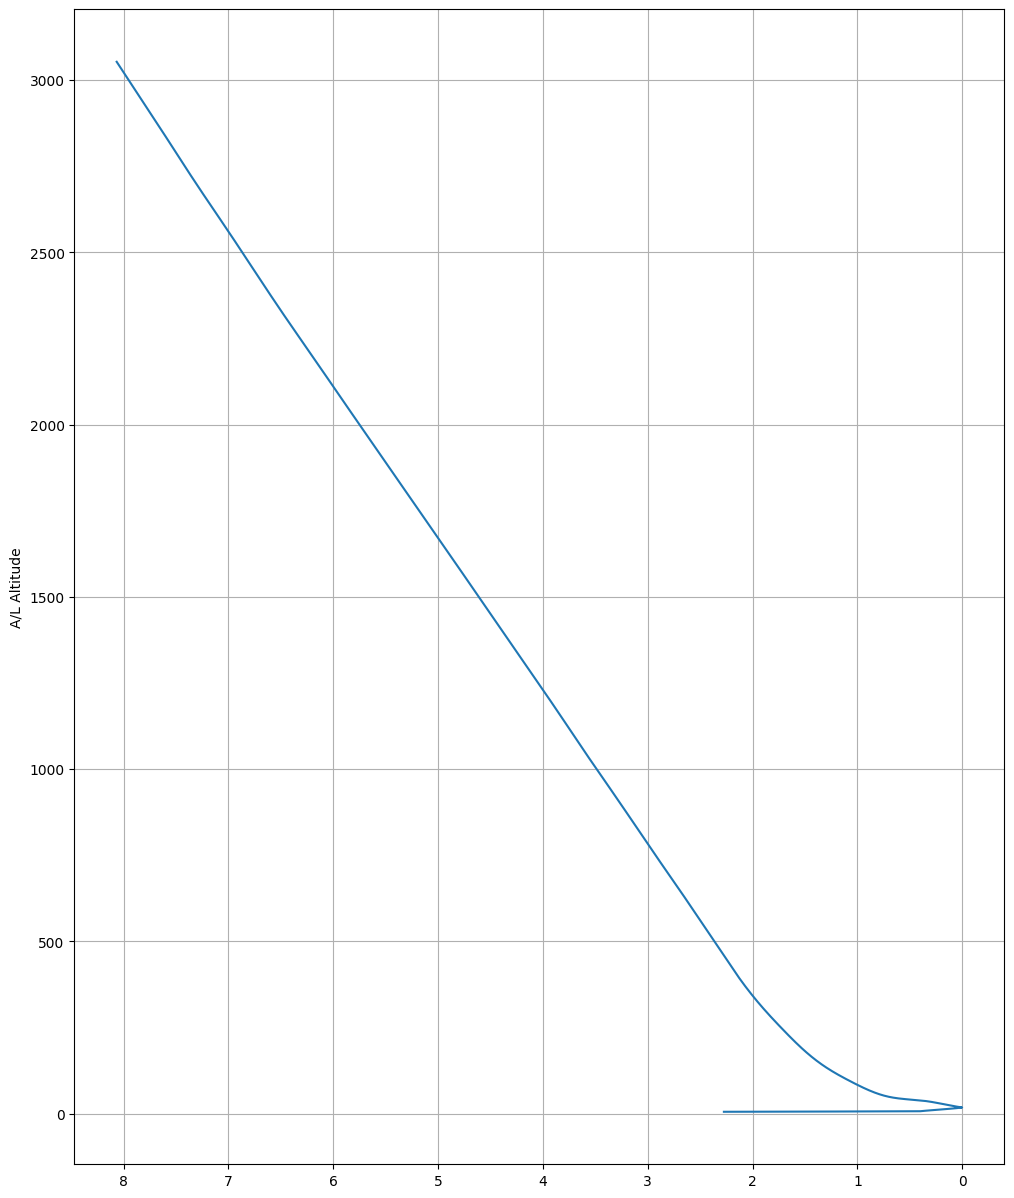

In [11]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('A/L Altitude')
plt_.grid()

plt_.plot(a_l_data['range'], a_l_data['rwy_alt'])

plt_.invert_xaxis()